Best Individual: [3, 5, 2, 8, 6, 4, 7, 1]
Best Fitness: 28


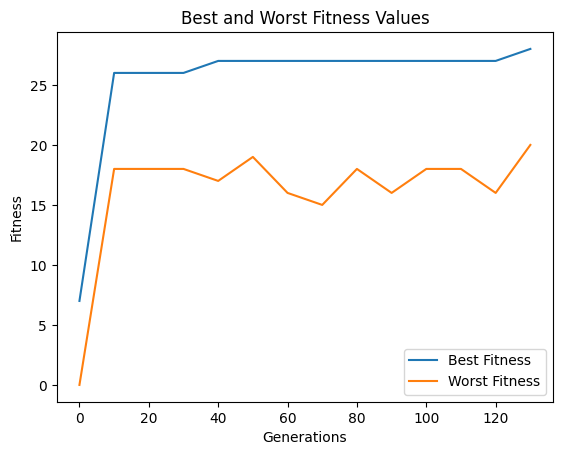

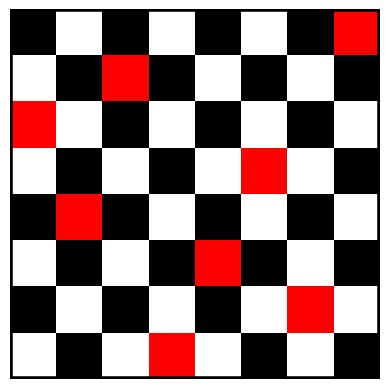

In [52]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def create_individual():
    # Create a random individual
    # return random.sample(range(1, 9), 8)
    return [1] * 8

def calculate_fitness(individual):
    clashes = 0
    for i in range(8):
        for j in range(i + 1, 8):
            # Check for clashes in rows and diagonals
            if individual[i] == individual[j] or abs(individual[i] - individual[j]) == abs(i - j):
                clashes += 1
    return 28 - clashes

def select_parent(population):
    # Select a parent using tournament selection
    tournament_size = 3
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda individual: calculate_fitness(individual))

def crossover(parent1, parent2):
    # Perform crossover between two parents
    crossover_point = random.randint(1, 7)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual):
    # Perform mutation on an individual
    mutation_point = random.randint(0, 7)
    new_value = random.randint(1, 8)
    individual[mutation_point] = new_value

def genetic_algorithm(population_size, generations):
    population = [create_individual() for _ in range(population_size)]
    best_fitnesses = []
    worst_fitnesses = []

    for generation in range(generations):
        new_population = []

        while len(new_population) < population_size:
            parent1 = select_parent(population)
            parent2 = select_parent(population)

            child1, child2 = crossover(parent1, parent2)

            mutate(child1)
            mutate(child2)

            new_population.extend([child1, child2])

        population = new_population

        if generation % 10 == 0:
            fitness_values = [calculate_fitness(individual) for individual in population]
            best_fitness = max(fitness_values)
            worst_fitness = min(fitness_values)
            best_fitnesses.append(best_fitness)
            worst_fitnesses.append(worst_fitness)

        if best_fitness == 28:
            break

    best_individual = max(population, key=lambda individual: calculate_fitness(individual))
    best_fitness = calculate_fitness(best_individual)

    if len(best_fitnesses) != len(worst_fitnesses):
        best_fitnesses.append(best_fitness)
        worst_fitnesses.append(worst_fitness)

    return best_individual, best_fitness, best_fitnesses, worst_fitnesses

# Run the genetic algorithm
population_size = 100
generations = 1000

best_individual, best_fitness, best_fitnesses, worst_fitnesses = genetic_algorithm(population_size, generations)

print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

# Plot the best and worst fitness values every 10 generations
generations_range = range(0, generations + 1, 10)
plt.plot(generations_range[:len(best_fitnesses)], best_fitnesses, label='Best Fitness')
plt.plot(generations_range[:len(worst_fitnesses)], worst_fitnesses, label='Worst Fitness')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Best and Worst Fitness Values')
plt.legend()
plt.show()

checkerboard = np.zeros((8, 8), dtype=int)
for i in range(8):
    for j in range(8):
        if (i+j)%2 == 0:
            checkerboard[i, j] = 1

# Set the locations to red
for col, row in enumerate(best_individual):
    checkerboard[row - 1, col] = 2

# Create a color map
cmap = mcolors.ListedColormap(['white', 'black', 'red'])
# Plot the checkerboard
plt.imshow(checkerboard, cmap=cmap)

# Draw a black border by creating a rectangle from lines
plt.plot([-0.5, 7.5, 7.5, -0.5, -0.5], [-0.5, -0.5, 7.5, 7.5, -0.5], color='black', linewidth=4)



# Hide the grid lines
plt.grid(False)

# Hide the axes
plt.axis('off')

plt.show()
